In [47]:
# dependencies (numpy, matplotlib, and keras)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from keras.layers import Input, Dense, Lambda, MaxPooling2D, Conv2D,Conv1D, Flatten, MaxPool2D
from keras.models import Model,Sequential
from keras import backend as K
from keras import objectives
from keras.layers.core import Dense, Dropout, Activation
from keras.datasets import mnist
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import pickle

In [68]:
#PREPARING THE DATA

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
Part2_PLOT1 = x_test

#Making the target categorical
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test,10)

#Splitting the data into three partitions - 70, 20 and 10
X_part1, X_part3, y_part1, y_part3 = train_test_split(x_train, y_train, test_size=0.1)
X_part2 = x_test
y_part2 = y_test


In [69]:
#Opening the encoded Outputs
file = open('encoded.txt', 'rb')
encoded_X = pickle.load(file)
file.close()
file = open('test_encoded.txt', 'rb')
test_encoded_X =  pickle.load(file)
file.close()

#Hyperparameters
features = encoded_X.shape[1]
batch_size = 100
epoch = 100

In [ ]:
#BEGIN FFNN
model = Sequential()
model.add(Dense(128, input_shape=(features,), activation = 'relu'))
# model.add(Dropout(0.2))
# model.add(Dense(230, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adadelta')

history = model.fit(encoded_X, y_part2,
          batch_size=batch_size,
          epochs=epoch,
          validation_data=(test_encoded_X,y_part3))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 128)               768       
_________________________________________________________________
dense_70 (Dense)             (None, 512)               66048     
_________________________________________________________________
dropout_38 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 10)                5130      
Total params: 71,946
Trainable params: 71,946
Non-trainable params: 0
_________________________________________________________________
Train on 10000 samples, validate on 6000 samples
Epoch 1/100
10000/10000 [==============================] - 2s 219us/step - loss: 0.8468 - acc: 0.7366 - val_loss: 6.1328 - val_acc: 0.1032
Epoch 2/100
10000/10000 [==============================] - 1s 54us/step - loss: 0.

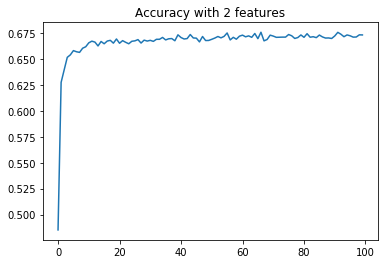

In [67]:
#PLOTTING ACCURACY
plt.plot(history.history['acc'])
plt.title('Accuracy with '+str(features)+' features')
plt.show()

9


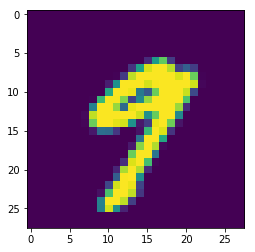

6


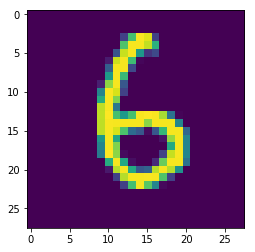

4


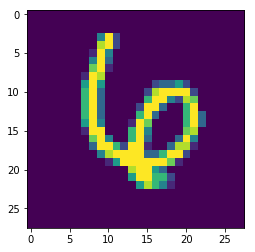

5


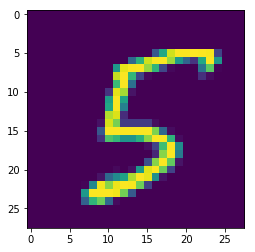

4


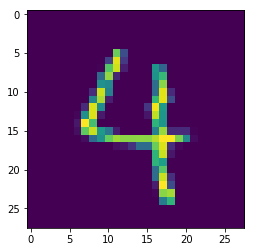

0


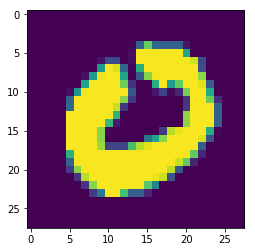

7


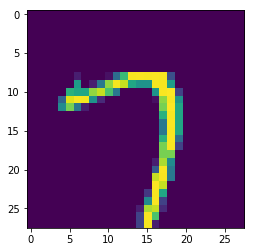

4


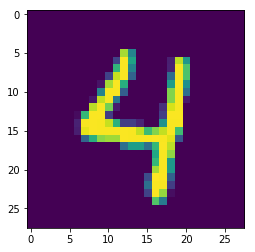

0


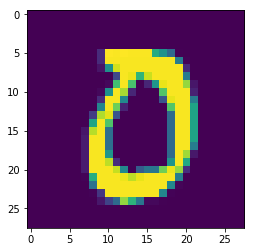

1


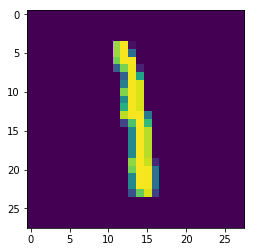

In [22]:
#View this shit
for i in range(20,30):
    
    num = i
    hi = np.array([encoded_X[num]])
    prediction = model.predict(hi)
    print(np.argmax(prediction))
    plt.imshow(X_part2[num].reshape((28,28)),cmap='viridis')
    plt.show()
#     hello = deocder.predict(np.array([encoded_X[num]]))
#     plt.imshow(hello.reshape((28,28)),cmap='viridis')
#     plt.show()

In [53]:
file = open('encoded.txt', 'rb')
testt = pickle.load(file)
testt = np.expand_dims(testt,axis=1)
testt = testt.reshape(10000,1,5,1)
testt.shape
file.close()

file = open('test_encoded.txt','rb')
trainn = pickle.load(file)
file.close()
trainn = np.expand_dims(trainn,axis=1)
trainn = trainn.reshape(6000,1,5,1)
trainn.shape
#Begin model
model = Sequential()
model.add(Conv2D(filters = 5, kernel_size = (1,1),
                 activation ='relu', input_shape = (1,5,1)))

# model.add(MaxPool2D(pool_size=(1,1)))
model.add(Dropout(0.25))
# model.add(Conv2D(filters = 64, kernel_size = (3,3),
#                  activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (1,1),
                 activation ='relu'))
# model.add(MaxPool2D(pool_size=(1,1), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
# model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(testt,y_part2,
          
          epochs=15)

Epoch 1/15
10000/10000 [==============================] - 2s 207us/step - loss: 1.1228 - acc: 0.6147
Epoch 2/15
10000/10000 [==============================] - 1s 92us/step - loss: 0.7522 - acc: 0.7319
Epoch 3/15
10000/10000 [==============================] - 1s 98us/step - loss: 0.6867 - acc: 0.7534
Epoch 4/15
10000/10000 [==============================] - 1s 99us/step - loss: 0.6444 - acc: 0.7704
Epoch 5/15
10000/10000 [==============================] - 1s 89us/step - loss: 0.6212 - acc: 0.7781
Epoch 6/15
10000/10000 [==============================] - 1s 91us/step - loss: 0.6102 - acc: 0.7841
Epoch 7/15
10000/10000 [==============================] - 1s 101us/step - loss: 0.6040 - acc: 0.7830
Epoch 8/15
10000/10000 [==============================] - 1s 98us/step - loss: 0.5995 - acc: 0.7878
Epoch 9/15
10000/10000 [==============================] - 1s 93us/step - loss: 0.5892 - acc: 0.7916
Epoch 10/15
10000/10000 [==============================] - 1s 93us/step - loss: 0.5810 - acc: 0.79

9


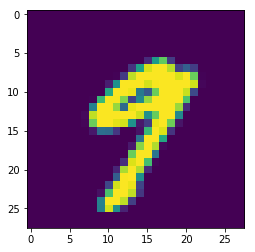

6


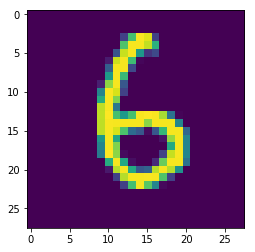

4


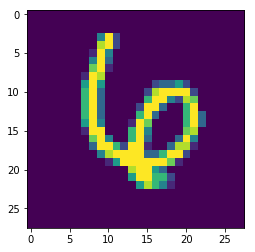

5


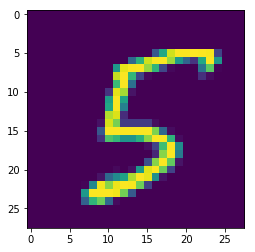

4


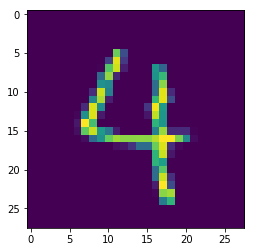

0


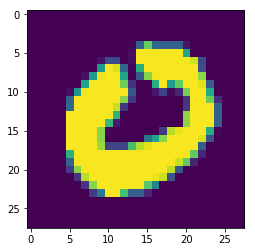

7


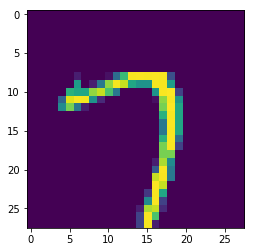

4


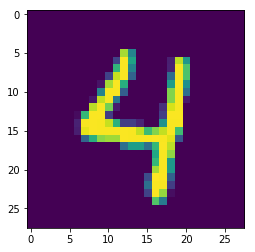

0


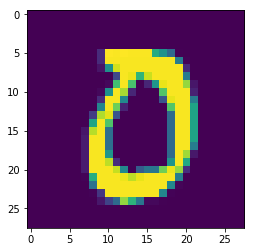

1


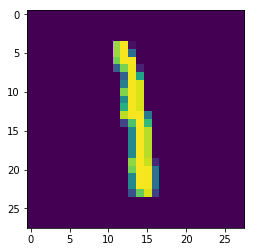

In [54]:
#View this shit
for i in range(20,30):
    
    num = i
    hi = np.array([testt[num]])
    prediction = model.predict(hi)
    print(np.argmax(prediction))
    plt.imshow(X_part2[num].reshape((28,28)),cmap='viridis')
    plt.show()
#     hello = deocder.predict(np.array([encoded_X[num]]))
#     plt.imshow(hello.reshape((28,28)),cmap='viridis')
#     plt.show()